<a href="https://colab.research.google.com/github/UmutCaner/MovieA/blob/main/MovieA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import re
import nltk
import pandas as pd
import nltk as nlp
nltk.download('stopwords')
import pickle
from nltk.corpus import stopwords
stopWords = set(stopwords.words('turkish'))
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
df_train = pd.read_csv('train.csv', encoding= 'unicode_escape')
df_train.head()

,Unnamed: 0,comment,Label
0,0,biri bana bu filmde benim anlamadigim bisey ol...,0
1,1,ya çocuklar ilk filmin sonunda büyüdüler ya bu...,1
2,2,film biraz daha uzun sürse harbi kiyameti göre...,0
3,3,pek orjinal bi cinayet yok ama orjinal oyuncul...,0
4,4,film tek kelimeyle muhtesemdi heleki sonundaki...,1


In [ ]:
df_test = pd.read_csv('test.csv', encoding= 'unicode_escape')
df_test.head()


,Unnamed: 0,comment,Label
0,0,arkadaslar film bence cok güzel su anda gidile...,1
1,1,mükemmel bir film ve sonu enfes. mutlaka izley...,1
2,2,epey bi uzak durun diyorum..bu ne ya iyice cil...,0
3,3,"sürükleyici bir aksiyon, özellikle sonu çok sa...",1
4,4,hayatimda izledigim en berbat filmdi gerçekten...,0


In [ ]:
def pre_processing(text):
    text = text.lower()  #Büyük harften -Küçük harfe çevirme
    text = re.sub("[^abcçdefgğhıijklmnoöprsştuüvyz]"," ",text)
    text=nltk.word_tokenize(text) # splits the words that are in the sentence from each other.
    text =[word for word in text if not word in set(stopwords.words("turkish"))]
    lemma=nlp.WordNetLemmatizer()
    text=[lemma.lemmatize(word) for word in text] # this code finds the root of the word for a word in the sentence and change them to their root form.
    text=" ".join(text)
    return text

In [ ]:
import re

def pre_processing(text):
    if isinstance(text, str):  # NaN hatasını önlemek için
        text = text.lower()  # Küçük harfe çevir
        text = re.sub(r'[^\w\s]', '', text)  # Noktalama işaretlerini kaldır
        return text
    else:
        return ""  # Eğer NaN ise boş string döndür

df_train["comment"].fillna("", inplace=True)
df_test["comment"].fillna("", inplace=True)

df_train["clean_text"] = df_train["comment"].apply(pre_processing)
df_test["clean_text"] = df_test["comment"].apply(pre_processing)


<ipython-input-37-026071302111>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train["comment"].fillna("", inplace=True)
<ipython-input-37-026071302111>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [ ]:
df_train.head()

,Unnamed: 0,comment,Label,clean_text
0,0,biri bana bu filmde benim anlamadigim bisey ol...,0,biri bana bu filmde benim anlamadigim bisey ol...
1,1,ya çocuklar ilk filmin sonunda büyüdüler ya bu...,1,ya çocuklar ilk filmin sonunda büyüdüler ya bu...
2,2,film biraz daha uzun sürse harbi kiyameti göre...,0,film biraz daha uzun sürse harbi kiyameti göre...
3,3,pek orjinal bi cinayet yok ama orjinal oyuncul...,0,pek orjinal bi cinayet yok ama orjinal oyuncul...
4,4,film tek kelimeyle muhtesemdi heleki sonundaki...,1,film tek kelimeyle muhtesemdi heleki sonundaki...


In [ ]:
X_train=df_train["clean_text"]
X_test=df_test["clean_text"]
y_train=df_train["Label"]
y_test=df_test["Label"]

print("x_train",X_train.shape)
print("x_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)


x_train (7996,)
x_test (2666,)
y_train (7996,)
y_test (2666,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
LogisticRegression = Pipeline([('tfidf', TfidfVectorizer()),('clf', LogisticRegression())])

LogisticRegression .fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LogisticRegression())])

In [ ]:
def plot_confusion_matrix(Y_test, Y_preds):
    conf_mat = confusion_matrix(Y_test, Y_preds)
    #print(conf_mat)
    fig = plt.figure(figsize=(6,6))
    plt.matshow(conf_mat, cmap=plt.cm.Blues, fignum=1)
    plt.yticks(range(2), range(2))
    plt.xticks(range(2), range(2))
    plt.colorbar();
    for i in range(2):
        for j in range(2):
            plt.text(i-0.2,j+0.1, str(conf_mat[j, i]), color='tab:red')

CV average score: 0.87
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      1333
           1       0.88      0.86      0.87      1333

    accuracy                           0.87      2666
   macro avg       0.87      0.87      0.87      2666
weighted avg       0.87      0.87      0.87      2666

Train Accuracy : 0.948
Test Accuracy : 0.874
0.8741335675537201 : is the precision score
0.8739684921230307 : is the recall score
0.8739545886655713 : is the f1 score


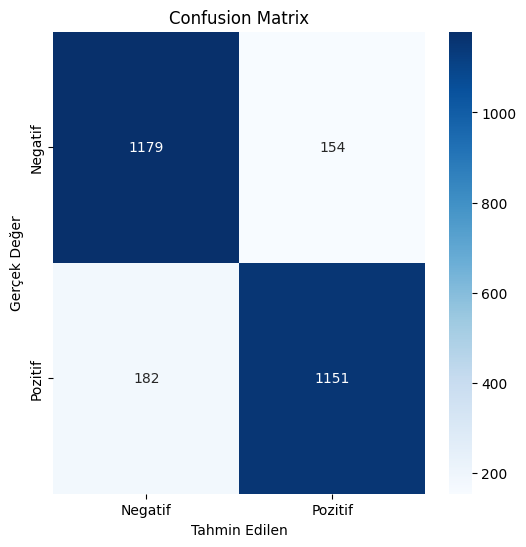

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

X_train = df_train["clean_text"].astype(str)
X_test = df_test["clean_text"].astype(str)
y_train = df_train["Label"]
y_test = df_test["Label"]

log_reg_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression(max_iter=500))
])

log_reg_pipeline.fit(X_train, y_train)

cv_scores = cross_val_score(log_reg_pipeline, X_train, y_train, cv=10)
print("CV average score: %.2f" % cv_scores.mean())

y_pred = log_reg_pipeline.predict(X_test)

cr = classification_report(y_test, y_pred)
print(cr)

print('Train Accuracy : %.3f' % log_reg_pipeline.score(X_train, y_train))
print('Test Accuracy : %.3f' % log_reg_pipeline.score(X_test, y_test))

print(f"{precision_score(y_test, y_pred, average='macro')} : is the precision score")
print(f"{recall_score(y_test, y_pred, average='macro')} : is the recall score")
print(f"{f1_score(y_test, y_pred, average='macro')} : is the f1 score")

def plot_confusion_matrix(Y_test, Y_preds):
    conf_mat = confusion_matrix(Y_test, Y_preds)
    fig, ax = plt.subplots(figsize=(6,6))
    sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", xticklabels=["Negatif", "Pozitif"], yticklabels=["Negatif", "Pozitif"], ax=ax)
    plt.xlabel("Tahmin Edilen")
    plt.ylabel("Gerçek Değer")
    plt.title("Confusion Matrix")
    plt.show()

plot_confusion_matrix(y_test, y_pred)






In [ ]:
!pip install requests
!pip install html5lib
!pip install bs4




In [1]:
import requests
from bs4 import BeautifulSoup

URL = "https://www.beyazperde.com/filmler/film-275210/kullanici-elestirileri/"
headers = {"User-Agent": "Mozilla/5.0"}

r = requests.get(URL, headers=headers)
soup = BeautifulSoup(r.content, 'html.parser')


comment_divs = soup.find_all("div", class_="content-txt review-card-content")


comment_list = [div.get_text(strip=True) for div in comment_divs]


if comment_list:
    print(f"İlk Yorum: {comment_list[0]}")
else:
    print("Yorum bulunamadı.")




İlk Yorum: Senaryosunu...Rob Edwards, Malcolm Spellman ve Dalan Musson'un...Kendi yazıkları hikayeden Peter Glanz ve yönetmen koltuğunda da oturan Julius Onah ile birlikte uyarlayarak kaleme aldıkları "Captain America: Brave New World"; bilim kurgu tarzdaki bir süper kahraman macerası olarak geliyor karşımıza...***Gelin isterseniz, 180 milyon dolarlık bütçesinin de sağladığı avantajla...Yeşil perde ve görsel efekt teknolojileriyle başarılı makyaj uygulamalarının yanı sıra zorluk derecesi yüksek sahnelerindeki koordinatörlüklerini; Alex Benevent, Joey Box, Cameron Early, Travis Gomez, Michael Hugghins, Mark R. Miscione, Leesa Pate ve James Young'ın üstlendikleri, dublör oyuncuların performanslarına yaslanılarak çekilen...Ve nihayetinde de...Brüt 414.1 milyon dolarlık bir hasılat rakamı ile de...Marvel Stüdyolarına büyük paralar kazandıran post-prodüksiyon harikası bu filme biraz daha yakından bakalım...***Film...Dört yıldızlı bir general iken...Amerika Birleşik Devletleri Başkanı seçile